# RE Image Classification
<hr>
Implementação de um algoritmo classificador de imagens de reflexo vermelho. O extrator de características deve ser um descritor de cor diverso. Todas as etapas serão otimizadas através do HyperOpt!

#### Carregar bibliotecas necessárias

In [1]:
import cv2
import glob

from matplotlib import pyplot as plt
import numpy as np

##  1. Carregar Imagens

### Diretório da base

<b>N_I</b> - Imagens de Reflexo Vermelho Normais <br>
<b>P_I</b> - Imagens de Reflexo Vermelho com Problemas <hr>

<b>N_M</b> - Máscaras de Reflexo Vermelho Normais <br>
<b>P_M</b> - Máscaras de Reflexo Vermelho com Problemas

In [2]:
N_I = "./data/olhos/normal"
P_I = "./data/olhos/problema"

N_M = "./data/marcacoes/normal"
P_M = "./data/marcacoes/normal"

As imagens foram carregadas pelo OpenCV2 junto com suas respectivas máscaras. A função abaixo recebe o <i>path</i> da pasta das imagens, o <i>path</i> da pasta de suas respectivas máscaras e a label atribuída.
<hr>
<b> 0 </b> - label para imagens normais <br>
<b> 1 </b> - label para imagens com problemas
<hr>

In [3]:
def carregarImgs(path_im, path_mk, label):
    
    imgs, labels = [], []
    
    for img in zip(glob.iglob(path_im + '/*.jpg'):
        
        img  = cv2.imread(img)
        img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Melhor deixar para aplicar as máscaras depois do pré
        # processamento!
        
        # mask = cv2.imread(mask, 0)
        # im_mask = cv2.bitwise_and(img, img, mask = mask)
                   
        imgs.append(img)
        labels.append(label)
    
    return imgs, labels

In [4]:
normais, labels_n  = carregarImgs(N_I, N_M, 0)
problema, labels_p = carregarImgs(P_I, P_M, 1)

##### Checagem das variáveis

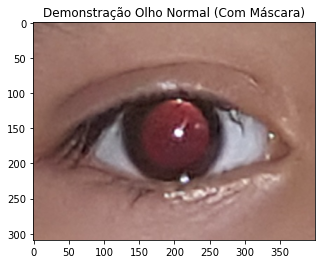

In [5]:
plt.imshow(normais[6])
plt.title('Demonstração Olho Normal (Com Máscara)')
plt.show()

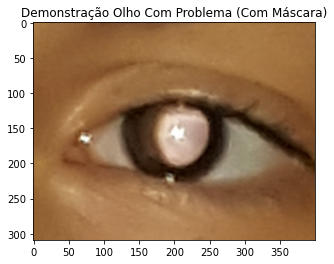

In [6]:
plt.imshow(problema[4])
plt.title('Demonstração Olho Com Problema (Com Máscara)')
plt.show()

In [7]:
print(f"IMAGENS NORMAIS\n\n{labels_n}\n\nNúmero total de images: {len(labels_n)}")

IMAGENS NORMAIS

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Número total de images: 88


In [8]:
print(f"IMAGENS PROBLEMA\n\n{labels_p}\n\nNúmero total de images: {len(labels_p)}")

IMAGENS PROBLEMA

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Número total de images: 30


## 2. Espaço de Cor - HyperSpace

3 Espectros de cores disponíveis para serem selecionados no HyperSpace:
<ul>
    <li>RGB - Red, Green, Blue (Padrão)</li>
    <li>HSV - Hue, Saturation, Value</li>
    <li>Lab - <i>Extremamente complicado de explicar</i></li>
</ul>

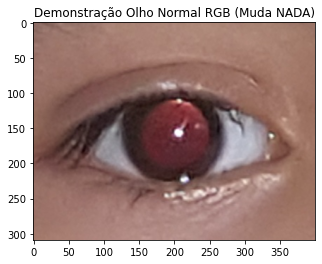

In [9]:
#### RGB
plt.imshow(normais[6])
plt.title('Demonstração Olho Normal RGB (Muda NADA)')
plt.show()

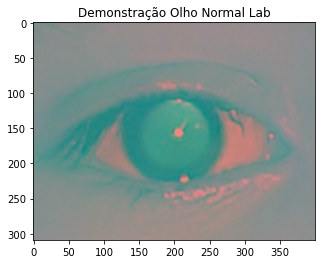

In [10]:
#### Lab
plt.imshow(cv2.cvtColor(normais[6], cv2.COLOR_RGB2Lab))
plt.title('Demonstração Olho Normal Lab')
plt.show()

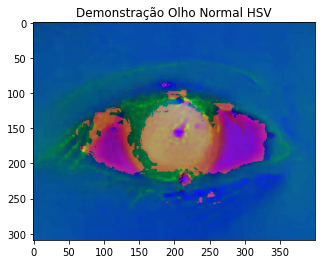

In [11]:
#### HSV
plt.imshow(cv2.cvtColor(normais[6], cv2.COLOR_RGB2HSV))
plt.title('Demonstração Olho Normal HSV')
plt.show()

##### Código para aplicação do Color Space

In [12]:
# Recebe uma imagem e o método escolhido no HyperSpace
def escolherEspacoDeCor(img, method):
    if method == 'lab':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    elif method == 'hsv':
        img = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    
    return img

## 3. Pré-processamento - HyperSpace

3 Métodos de pré processamento disponíveis para serem selecionados no HyperSpace:
<ul>
    <li>Equalização de Histograma</li>
    <li>Contraste CLAHE</li>
    <li>Cores Opostas</li>
</ul>

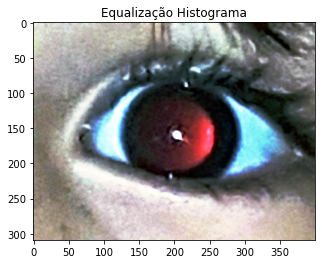

In [13]:
#### Equalização de Histograma

def equalizarHist(img):
    r, g, b = cv2.split(img)

    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)

    image_eq = cv2.merge((r_eq, g_eq, b_eq))
    
    return image_eq

plt.imshow(equalizarHist(normais[7]))
plt.title('Equalização Histograma')
plt.show()

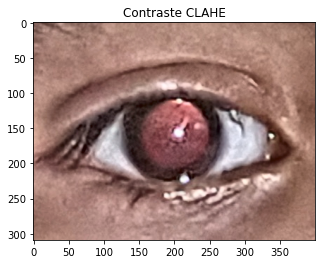

In [14]:
#### Contraste CLAHE

def clahe(img, clip_limit = 3):
        
    img_lab   = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b   = cv2.split(img_lab)

    clahe     = cv2.createCLAHE(clipLimit = clip_limit, tileGridSize = (8, 8))
    l_clahe   = clahe.apply(l)
    
    img_clahe = cv2.merge((l_clahe, a, b))
    
    img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_LAB2RGB)
        
    return img_clahe

plt.imshow(clahe(normais[6]))
plt.title('Contraste CLAHE')
plt.show()

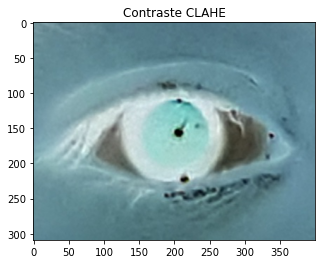

In [15]:
#### Cores Opostas

def coresOpostas(img):
    img_co = 255 - img
    
    return img_co

plt.imshow(coresOpostas(normais[6]))
plt.title('Contraste CLAHE')
plt.show()

In [16]:
# Recebe uma imagem e o método escolhido no HyperSpace
def escolherPreProcessamento(img, method):
    if method == 'equalizarHistograma':
        img = equalizarHist(img)
    elif method == 'clahe':
        img = clahe(img)
    else:
        img = coresOpostas(img)
    
    return img

## 4. Aplicar Máscara (Opcional?) ### Não concluído

Existe a possibilidade de aplicar ou não a máscara. Também será selecionado no HyperSpace!

In [21]:
def carregarMasks(imgs, path_mk):
    
    imgs_mask = []
    
    for img, mask in zip(imgs,
                         glob.iglob(path_mk + '/*.jpg')):
        
        msk     = cv2.imread(mask, 0)
        im_mask = cv2.bitwise_and(img, img, mask = msk)
        
        imgs_mask.append(im_mask)
    
    return imgs_mask

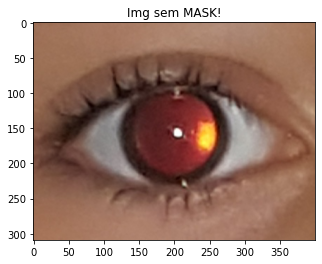

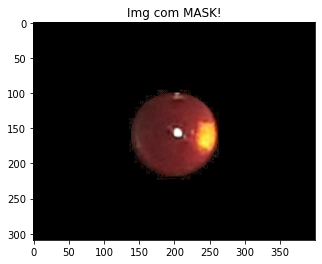

In [42]:
normais_mask = carregarMasks(normais, N_M)

plt.imshow(normais[10])
plt.title('Img sem MASK!')
plt.show()

plt.imshow(normais_mask[10])
plt.title('Img com MASK!')
plt.show()

## 5. Descritores de Cor - HyperSpace

2 Métodos Descritors de cor disponíveis para serem selecionados no HyperSpace:
<ul>
    <li>Histograma de Cor</li>
    <li>Descritor de Cor Dominante</li>
</ul>